In [1]:
import sys
sys.path.append('.')

from services.news_dra import generate_search_terms


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
search_terms  = generate_search_terms("which companies will benefit from US trade tariff impositions?")

In [9]:
search_terms.terms[0]

SearchTerm(term='US steel manufacturers benefiting from tariffs', explanation='Steel tariffs can protect domestic steel manufacturers from foreign competition, increasing their market share and profitability.')

In [3]:

from langchain_tavily import TavilySearch
from dotenv import load_dotenv
import os
load_dotenv()
tavily_search_tool = TavilySearch(
    max_results=5,
    topic="finance",
    api_key=os.getenv("TAVILY_API_KEY"),
)


In [7]:
search_terms[0]

TypeError: 'SearchTerms' object is not subscriptable

In [ ]:
all_urls = []
for term_info in search_terms.terms:
    term = term_info.get("term", "")
 # Search Tavily for this term
    try:
        result = tavily_search_tool.invoke({"query": term})
        all_urls.extend(result["results"])
       
    except Exception as e:
        print(f"Error searching for term '{term}': {e}")


In [23]:
result = tavily_search_tool.invoke({"query": "Gensole engineering stock crash"})

In [25]:
result

{'query': 'Gensole engineering stock crash',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': "Why Gensol Engineering's market crash was no surprise - Value Research",
   'url': 'https://www.valueresearchonline.com/stories/223510/why-gensol-engineering-stock-crash-7-warning-signs-investors-missed/',
   'content': "Gensol Engineering's stock plunged 75 per cent from its peak after an ICRA downgrade to default status. Learn the seven critical red flags that signalled trouble before the dramatic collapse. ... Why Gensol Engineering's market crash was no surprise. Once a market favourite, Gensol Engineering is now laden with debt and suffers from poor",
   'score': 0.81770587,
   'raw_content': None},
  {'title': '80% crash from peak! Gensol shares turn biggest wealth ... - Mint',
   'url': 'https://www.livemint.com/market/stock-market-news/80-crash-from-peak-gensol-shares-turn-biggest-wealth-destroyers-of-2025-retail-investor-lose-rs-1-200-cr-1174236275

In [27]:
search_results  = result["results"]
# make list of urls
urls=[]
for result in search_results:
    urls.append(result["url"])

urls


['https://www.valueresearchonline.com/stories/223510/why-gensol-engineering-stock-crash-7-warning-signs-investors-missed/',
 'https://www.livemint.com/market/stock-market-news/80-crash-from-peak-gensol-shares-turn-biggest-wealth-destroyers-of-2025-retail-investor-lose-rs-1-200-cr-11742362750731.html',
 'https://www.moneycontrol.com/news/business/markets/mc-explains-why-did-gensol-engineering-shares-crash-80-from-highs-12963045.html',
 'https://getmoneyrich.com/why-gensol-engineerings-stock-crash-is-a-cautionary-tale-for-every-investor/',
 'https://www.financialexpress.com/market/gensol-plunges-74-in-2025-heres-why-the-share-price-hit-another-5-lower-circuit-3788947/']

In [4]:
from langchain_tavily import TavilyExtract
tavily_extract_tool = TavilyExtract(
    extract_depth="advanced",
    include_images=False,
    api_key=os.getenv("TAVILY_API_KEY"),
)

In [28]:
extract_result=tavily_extract_tool.invoke({"urls": urls})

In [29]:
# concat all the raw_content
raw_content = ""
for result in extract_result["results"]:
    raw_content += result["raw_content"]

raw_content

'Published Time: 2025-03-12T05:35:07+00:00\nWhy Gensol Engineering’s Stock Crash Is a Cautionary Tale for Every Investor - GETMONEYRICH\nSkip to content\nSubscribe To The Stock Engine\n GETMONEYRICH\n\nArticles\nBest Stocks India [2025]\nBest Low Price Shares [2025]\nHigh Return Stocks [2025]\n\n\nBooks\nAbout\nStock Engine\n\nJoin Free\nSubscribe To The Stock Engine\n GETMONEYRICH\nJoin Free\n / Stock Investing / Companies / Gensol Engineering /\nWhy Gensol Engineering’s Stock Crash Is a Cautionary Tale for Every Investor\nByMANI\nYou’ve probably noticed the downward spiral in Gensol Engineering. Once a darling of the solar EPC world, this stock has gone from a twelvefold wealth creator to a jaw-dropping -70% crash from its peak in just a year. What happened here? I dug into a few recent news articles to get the full scoop, and honestly, it’s a story packed with lessons we can all learn from. Whether one is a seasoned investor or a beginner into the market, there is a lesson for all o

In [32]:


from langchain_openai import AzureChatOpenAI
llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),
    api_key=os.getenv("API_KEY"),
    api_version=os.getenv("API_VERSION"),
    deployment_name=os.getenv("DEPLOYMENT_NAME"),
    temperature=0.1
)
# make medium article on raw conetent 
from langchain_core.prompts import ChatPromptTemplate

def make_medium_article(raw_content: str) -> str:
    """Make a medium article on the raw content"""
    medium_article_prompt = ChatPromptTemplate.from_messages([
        ("system", """You are an expert financial researcher specializing deep research, you are known for foresic accunting.
        generate a very detailed , covering all the details medium article on from raw content in markdown format. 
       
        """),
        ("user", "raw: {raw_content}")
    ])
    
    medium_article_chain = medium_article_prompt|llm
    article = medium_article_chain.invoke({"raw_content": raw_content})
    return article.content





In [1]:
from services.news_dra import research_workflow


for event in research_workflow.stream({"query": "companies that will benefit from US trade tariff impositions"}):
    # Pretty print each event dictionary with rich formatting
    print(event)


USER_AGENT environment variable not set, consider setting it to identify your requests.



--- STARTING WIDE RESEARCH FOR: companies that will benefit from US trade tariff impositions ---
Generating search terms for query: companies that will benefit from US trade tariff impositions


2025-03-31 00:41:48,887 - httpx - INFO - HTTP Request: POST https://ds-testing-swe-new.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"
2025-03-31 00:41:48,909 - services.news_dra - INFO - Search terms generated: [SearchTerm(term='US manufacturing companies benefiting from trade tariffs 2023', explanation='This term targets US-based manufacturing companies that are likely to benefit from trade tariffs due to reduced competition from foreign imports, leading to potential investment opportunities in domestic production.'), SearchTerm(term='US agricultural sector gains from trade tariffs 2023', explanation='This term focuses on the US agricultural sector, which may see benefits from trade tariffs through increased demand for domestically produced agricultural products, presenting potential investment opportunities in this industry.')]


Generated search terms: [SearchTerm(term='US manufacturing companies benefiting from trade tariffs 2023', explanation='This term targets US-based manufacturing companies that are likely to benefit from trade tariffs due to reduced competition from foreign imports, leading to potential investment opportunities in domestic production.'), SearchTerm(term='US agricultural sector gains from trade tariffs 2023', explanation='This term focuses on the US agricultural sector, which may see benefits from trade tariffs through increased demand for domestically produced agricultural products, presenting potential investment opportunities in this industry.')]
Search terms generated: 2
Searching for term: US manufacturing companies benefiting from trade tariffs 2023
Filtered URLs: 1 out of 5
Found 1 relevant URLs for term: US manufacturing companies benefiting from trade tariffs 2023
Searching for term: US agricultural sector gains from trade tariffs 2023


2025-03-31 00:41:54,548 - services.news_dra - INFO - Filtered URLs: [{'title': 'Companies Poised to Benefit from New U.S. Tariffs | Market Analysis', 'url': 'https://get.ycharts.com/resources/blog/how-new-u-s-tariffs-could-create-winners-companies-positioned-to-benefit-from-trade-policies/', 'content': 'Companies Poised to Benefit from New U.S. Tariffs | Market Analysis Resources > Blog > Economy > How New U.S. Tariffs Could Create Winners: Companies Positioned to Benefit from Trade Policies How New U.S. Tariffs Could Create Winners: Companies Positioned to Benefit from Trade Policies Nucor Corporation (NUE) & Steel Dynamics (STLD) – As tariffs increase the cost of imported steel and aluminum, U.S.-based steel producers could benefit from higher demand for domestically sourced materials. For investors looking to gain exposure to industries positioned to benefit from tariffs, several ETFs focus on domestic manufacturing, agriculture, and energy: Track Sector & ETF Performance → Use YCha

Filtered URLs: 1 out of 5
Found 1 relevant URLs for term: US agricultural sector gains from trade tariffs 2023
Total URLs collected: 2
{'wide_research': {'search_terms': [SearchTerm(term='US manufacturing companies benefiting from trade tariffs 2023', explanation='This term targets US-based manufacturing companies that are likely to benefit from trade tariffs due to reduced competition from foreign imports, leading to potential investment opportunities in domestic production.'), SearchTerm(term='US agricultural sector gains from trade tariffs 2023', explanation='This term focuses on the US agricultural sector, which may see benefits from trade tariffs through increased demand for domestically produced agricultural products, presenting potential investment opportunities in this industry.')], 'urls': [{'title': 'Companies Poised to Benefit from New U.S. Tariffs | Market Analysis', 'url': 'https://get.ycharts.com/resources/blog/how-new-u-s-tariffs-could-create-winners-companies-positioned

2025-03-31 00:41:55,639 - services.news_dra - INFO - Extract result: {'results': [{'url': 'https://get.ycharts.com/resources/blog/how-new-u-s-tariffs-could-create-winners-companies-positioned-to-benefit-from-trade-policies/', 'raw_content': 'Published Time: 2025-03-04T15:15:00+00:00\nCompanies Poised to Benefit from New U.S. Tariffs | Market Analysis\n\nWe value your privacy!\nYCharts and its third-party tools process personal data. You can opt out of the processing of your personal information by clicking on the “Do Not Process My Personal Information” link.\nDo Not Process My Personal Information\nOpt-out Preferences \nWe use third-party cookies that help us analyze how you use this website, store your preferences, and provide the content and advertisements that are relevant to you. However, you can opt out of these cookies by checking "Do Not Process My Personal Information" and clicking the "Confirm" button. Once you opt out, you can opt in again at any time by unchecking "Do Not P

Successfully extracted content from https://get.ycharts.com/resources/blog/how-new-u-s-tariffs-could-create-winners-companies-positioned-to-benefit-from-trade-policies/
Content length: 12240 characters
[2/2] Extracting content from: Trump's tariffs and trade wars threaten our food security (https://www.cspinet.org/cspi-news/trumps-tariffs-and-trade-wars-threaten-our-food-security)


2025-03-31 00:42:07,318 - services.news_dra - INFO - Extract result: {'results': [{'url': 'https://www.cspinet.org/cspi-news/trumps-tariffs-and-trade-wars-threaten-our-food-security', 'raw_content': "Trump’s tariffs and trade wars threaten our food security | Center for Science in the Public Interest\nSkip to main content\n\n\nLog In\nGet email updates\n\nDonate\n\nOne Time Gift\nGive Monthly\nMore Ways to Give\n\n\n\nHealthy Living\n\nWhat to Eat\nThe Basics\nShop Smart\nRestaurant Food\nRecipes\n\n\nStaying Healthy\nPreventing Disease\nExercise\nFact vs. Fiction\nThe Planet & Your Health\nAdditives & Contaminants\nAvoid Food Poisoning\nVitamins & Supplements\nWeight & Health\n\n\n\nFeatured\n\nOur guide to food additive safety\nCan home remedies ease cold symptoms?\nHow to pick your food packaging\nThe Healthy Cook's chickpea tagine\n\n\n\nAdvocacy\n\nCampaigns\nPathogens and food safety: Farm to fork\nNew York nutrient warning labels\nPredatory food marketing\nBanning Red 3\nDietary

Successfully extracted content from https://www.cspinet.org/cspi-news/trumps-tariffs-and-trade-wars-threaten-our-food-security
Content length: 21301 characters
Successfully extracted content from 2 URLs
{'extract_content': {'research_docs': {'https://get.ycharts.com/resources/blog/how-new-u-s-tariffs-could-create-winners-companies-positioned-to-benefit-from-trade-policies/': {'title': 'Companies Poised to Benefit from New U.S. Tariffs | Market Analysis', 'content': 'Companies Poised to Benefit from New U.S. Tariffs | Market Analysis Resources > Blog > Economy > How New U.S. Tariffs Could Create Winners: Companies Positioned to Benefit from Trade Policies How New U.S. Tariffs Could Create Winners: Companies Positioned to Benefit from Trade Policies Nucor Corporation (NUE) & Steel Dynamics (STLD) – As tariffs increase the cost of imported steel and aluminum, U.S.-based steel producers could benefit from higher demand for domestically sourced materials. For investors looking to gain expos

2025-03-31 00:42:14,757 - httpx - INFO - HTTP Request: POST https://ds-testing-swe-new.openai.azure.com/openai/deployments/gpt-4o/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"
2025-03-31 00:42:14,760 - services.news_dra - INFO - Companies batch: [CompanyInsight(company_name='Caterpillar Inc.', ticker_symbol='CAT', reason='Caterpillar is a major player in construction and heavy machinery, and could gain from reduced competition with foreign equipment manufacturers due to tariffs.', confidence=9), CompanyInsight(company_name='Deere & Co.', ticker_symbol='DE', reason='Deere, an agricultural equipment producer, may see increased domestic demand if tariffs make foreign alternatives more expensive.', confidence=8), CompanyInsight(company_name='Nucor Corporation', ticker_symbol='NUE', reason='As tariffs increase the cost of imported steel and aluminum, Nucor could benefit from higher demand for domestically sourced materials.', confidence=8), CompanyInsight(company_name='S

Found 21 companies in this batch
{'extract_companies': {'companies': [CompanyInsight(company_name='Caterpillar Inc.', ticker_symbol='CAT', reason='Caterpillar is a major player in construction and heavy machinery, and could gain from reduced competition with foreign equipment manufacturers due to tariffs.', confidence=9), CompanyInsight(company_name='Deere & Co.', ticker_symbol='DE', reason='Deere, an agricultural equipment producer, may see increased domestic demand if tariffs make foreign alternatives more expensive.', confidence=8), CompanyInsight(company_name='Nucor Corporation', ticker_symbol='NUE', reason='As tariffs increase the cost of imported steel and aluminum, Nucor could benefit from higher demand for domestically sourced materials.', confidence=8), CompanyInsight(company_name='Steel Dynamics', ticker_symbol='STLD', reason='Steel Dynamics could benefit from higher demand for domestically sourced steel due to increased tariffs on imports.', confidence=8), CompanyInsight(com

In [11]:
# # print name, ticker and reason for selecting the company
ticker_symbols= []
for company in event["extract_companies"]["companies"]:
    print(f"Name: {company.company_name}, Ticker: {company.ticker_symbol}, Reason: {company.reason, company.confidence} \n\n")
    # make a list of ticker symbols
    ticker_symbols.append(company.ticker_symbol)


Name: Caterpillar Inc., Ticker: CAT, Reason: ('Caterpillar is a major player in construction and heavy machinery, and could gain from reduced competition with foreign equipment manufacturers due to tariffs.', 9) 


Name: Deere & Co., Ticker: DE, Reason: ('Deere, an agricultural equipment producer, may see increased domestic demand if tariffs make foreign alternatives more expensive.', 8) 


Name: Nucor Corporation, Ticker: NUE, Reason: ('As tariffs increase the cost of imported steel and aluminum, Nucor could benefit from higher demand for domestically sourced materials.', 8) 


Name: Steel Dynamics, Ticker: STLD, Reason: ('Steel Dynamics could benefit from higher demand for domestically sourced steel due to increased tariffs on imports.', 8) 


Name: ExxonMobil, Ticker: XOM, Reason: ('ExxonMobil, with strong U.S. production footprints, stands to benefit from reduced foreign imports due to tariffs.', 8) 


Name: Chevron, Ticker: CVX, Reason: ('Chevron, a large-cap oil company with stro

In [6]:
company

'companies'

In [12]:
ticker_symbols

['CAT',
 'DE',
 'NUE',
 'STLD',
 'XOM',
 'CVX',
 'EQT',
 'LNG',
 'ADM',
 'BG',
 'TSN',
 'PPC',
 'CF',
 'MOS',
 'INTC',
 'TXN',
 'MU',
 'LMT',
 'RTX',
 'NOC',
 'BA']

In [7]:
extract_result = tavily_extract_tool.invoke({"urls": ["https://www.reuters.com/business/autos-transportation/auto-industry-rocked-by-trumps-25-tariffs-us-imports-2025-03-27/"]})

raw_content = extract_result["results"][0].get("raw_content", "")


TypeError: string indices must be integers, not 'str'

In [8]:
event["extract_content"]

NameError: name 'event' is not defined

In [6]:
extract_result

'No extracted results found for \'["https://www.researchgate.net/publication/369691028_The_Impact_of_the_US-China_Trade_War_on_China\'s_Semiconductor_Industry"]\'. Suggestions: . Try modifying your extract parameters with one of these approaches.'

In [33]:
# print medium article in markdown format using ipython display markdown
from IPython.display import Markdown
display(Markdown(make_medium_article(raw_content)))

# Why Gensol Engineering’s Stock Crash Is a Cautionary Tale for Every Investor

## Introduction

Gensol Engineering, once a shining star in the solar EPC industry, has experienced a dramatic fall from grace. The company's stock, which had previously delivered twelvefold returns, has plummeted by 70% from its peak within a year. This article delves into the reasons behind this crash and highlights the lessons that investors can learn from Gensol's story.

## The Rise and Fall of Gensol Engineering

### The Meteoric Rise

From March 2022 to February 2024, Gensol Engineering's share price soared, transforming modest investments into substantial fortunes. The company's revenue skyrocketed from Rs.75 crore in FY20 to Rs.904 crore in FY24, driven by its solar EPC business and ventures into EV leasing and manufacturing. Investors were optimistic, believing that Gensol could do no wrong.

### The Dramatic Fall

Fast forward to March 2025, and the scenario is starkly different. The stock has dropped 70% over the past year, hitting a 52-week low of Rs.276 on the NSE. In just 30 days, it wiped out 54% of investor wealth. Credit ratings have tanked, and the company is drowning in debt. What went wrong?

## Understanding the Mess

### Trigger #1: Credit Rating Downgrades

Gensol Engineering faced significant credit rating downgrades due to delays in servicing term loan obligations. Both ICRA and CARE Ratings downgraded the company's credit ratings to "D" (default) in early March 2025. ICRA pointed to liquidity mismatches and alleged falsified documents on debt servicing, claims that Gensol denies and is investigating.

Promoter share pledges jumped from 63.06% in March 2024 to 85.5% in February 2025, signaling serious cash flow strain. The stock hit the 10% lower circuit at Rs 335.35 on the BSE, dragging its market cap down to Rs 1,274.41 crore.

### Trigger #2: Promoter Moves That Raised Eyebrows

Promoters infused Rs.29 crore into the company by converting warrants into equity shares at Rs 871 each. However, they also sold Rs.9 lakh shares (2.37% of equity) earlier in March, raising liquidity concerns. Some of these share sales were forced margin calls by lenders, not strategic moves as Gensol framed them. Mixed signals left investors wondering about the promoters' confidence in Gensol's future.

### Trigger #3: A Debt Bomb Waiting to Explode

Gensol's growth came with a mountain of debt. The debt-to-equity ratio ballooned from 0.06 in FY21 to 3.42 in FY24. Long-term debt increased from Rs.5.52 crore in FY20 to Rs.857 crore in FY24, while total debt zoomed from Rs.7.71 crore to Rs.1,396 crore. Despite EBITDA hitting Rs 230 crore in FY24, cash flow from operations was a negative Rs 98 crore, indicating that the company was making money on paper but not generating usable cash.

The interest coverage ratio dropped to 1.7 in FY24 from 3.6 in FY22, signaling financial distress. The venture into EV leasing added more debt, creating a recipe for disaster.

## The Red Flags We Should’ve Seen

### Stock Manipulation Allegations

There were allegations of stock manipulation tied to the Mahadev betting app scandal. Overpromising revenue, like Rs 1,200 crore for FY24 when they only hit Rs 960 crore, was disappointing. The 30,000 EV pre-orders hyped at the Bharat Mobility Expo 2025 turned out to be "expressions of interest," not binding orders.

### Diversification Mess

Jumping from solar EPC to EV leasing and manufacturing stretched Gensol thin. Frequent equity dilution and promoter stake sales chipped away at investor trust.

## What’s Next for Gensol?

The company is not giving up yet. On March 13, 2025, the board will discuss a stock split and possible fundraising through equity or foreign currency convertible bonds. However, with the stock down 70% from its 52-week high and a P/E ratio crashing from over 100 to 13, it's a tough sell.

## Lessons for Small Investors

### Debt Matters

Growth fueled by borrowing can be a ticking time bomb. Always check the debt-to-equity ratio and cash flow numbers—not just the shiny revenue headlines.

### Watch the Promoters

If promoters are selling big chunks or pledging most of their shares, it's a sign of stress. Actions speak louder than words.

### Don’t Buy the Hype

Pre-orders, diversification into "hot" sectors, and lofty revenue goals mean nothing if execution is shaky or the numbers don't add up.

### Credit Ratings Aren’t Just Noise

A downgrade to "default" is a massive warning. Dig into why it happened.

### Cheap Isn’t Always Good

A low P/E might tempt you, but if the company is a mess, it's not a bargain—it's a trap.

## Conclusion

Gensol Engineering’s fall from grace is a cautionary tale for investors. It's a reminder to stay sharp and skeptical. If you're thinking of investing in Gensol now, consider whether they can climb out of this debt hole and if the management is trustworthy. For now, the risks outweigh the rewards.

What do you think? Have you followed Gensol’s journey or seen something similar with another stock? Drop your thoughts below, I’d love to hear your take.

Have a safe investing.

## Post Tags

#GensolEngineering #StockCrash #InvestingLessons #DebtRisks

## Comments

### Dr V S P Rao

Jaggi saheb has a different take on the stock. He has already infused over 25 crore immediately, selling the shares at a rock bottom price and converted warrants at 871 a piece. I am sure he will inject more capital into the company converting other warrants too. Once cash comes into the books, debt repayment should not be an issue. His EV diversification is a big drag on the stock and Jaggi saheb has already taken the call to get out of the mess, rightly so under the circumstances. Plus the other diversification bets proved to be futile exercises, so he will get out of those also, to save the sinking ship. All in all, a good stock with growth potential has become a dead horse virtually, beaten mercilessly by the Stock Market. This is a wake-up call, and if he wants to revisit the stock market with his other bets–I am told he is planning IPOs for all the four babies that he was nursing so far including Blue Smart—he needs to save Gensol, putting his heart and soul into the company. An army man imbued with nerves of steel and muscles of iron, I am sure, he will overcome all these problems sooner than expected. The market cap has come to 1000 cr and with additional capital infusion, the stock should recover. Gimmicks like stock split will not work, unless he carries out a rectificational exercise with dedication and commitment. You cannot fool everybody in the street all the time with such gimmicks. Even a bonus issue will not work. He needs to repay the debt urgently and the day this happens, the stock will begin to dance.

### MANI

Thanks for sharing your views. Great (and deep) point.

## Leave a Reply

Your email address will not be published. Required fields are marked *

Comment *

Name *

Email *

Δ

---

GETMONEYRICH

Stock Analysis Algorithm

Social

About Me

Twitter

Linkedin

Youtube

Facebook

Instagram

Quick Links

Stock Basics

Fundamental Analysis

Articles

Bookshelf

Read

T&C

Privacy Policy

Pricing

Refund Policy

Disclaimer

© 2025 GETMONEYRICH

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from optimization.monte_carlo_optimizer import MonteCarloOptimizer
# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid' for older versions
sns.set_theme()  # This will set the seaborn theme

YF.download() has changed argument auto_adjust default to True


[**********************67%*******                ]  14 of 21 completed2025-03-31 00:48:56,022 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************90%******************     ]  19 of 21 completed2025-03-31 00:48:56,086 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  21 of 21 completed



Optimal Portfolio Weights:
CAT: 0.0001
DE: 0.0195
NUE: 0.0222
STLD: 0.0598
XOM: 0.0098
CVX: 0.1083
EQT: 0.0458
LNG: 0.1059
ADM: 0.0173
BG: 0.0322
TSN: 0.0782
PPC: 0.0083
CF: 0.0641
MOS: 0.0590
INTC: 0.0187
TXN: 0.0822
MU: 0.0264
LMT: 0.0763
RTX: 0.0105
NOC: 0.0952
BA: 0.0603

Portfolio Metrics:
Expected Return: 0.1897
Volatility: 0.1916
Sharpe Ratio: 0.7551


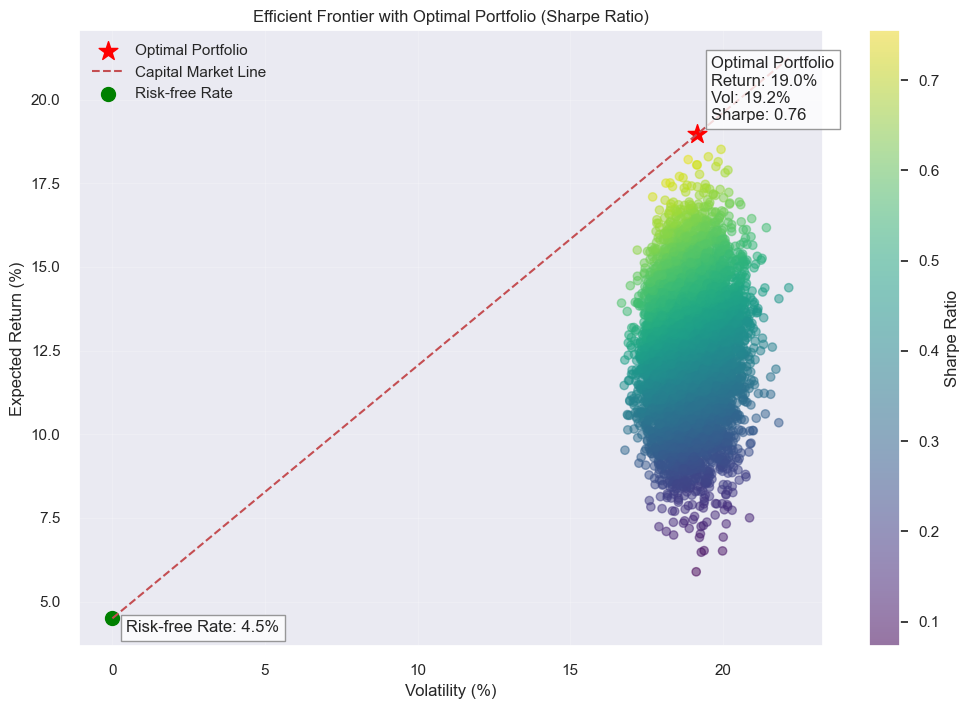

In [14]:
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'WMT', 'PG', 'KO', 'MCD', 'HD', 'UNH']
tickers = ticker_symbols
# Example with historical data
optimizer = MonteCarloOptimizer(
    tickers=tickers,
    start_date='2022-01-01',
    risk_free_rate=0.045,
    ratio="sharpe"
)

# Run optimization
result = optimizer.run_monte_carlo(n_simulations=10000)

# Print results
print("\nOptimal Portfolio Weights:")
for ticker, weight in result.weights.items():
    print(f"{ticker}: {weight:.4f}")

print("\nPortfolio Metrics:")
print(f"Expected Return: {result.expected_return:.4f}")
print(f"Volatility: {result.volatility:.4f}")
print(f"Sharpe Ratio: {result.ratio_value:.4f}")

# Plot results
optimizer.plot(save_path='efficient_frontier.png', live=True)



Optimal Portfolio Weights (Custom Estimates):
AAPL: 0.2263
MSFT: 0.0805
JPM: 0.0405
V: 0.2105
WMT: 0.0008
PG: 0.0013
KO: 0.0424
MCD: 0.1401
HD: 0.0433
UNH: 0.2142

Portfolio Metrics (Custom Estimates):
Expected Return: 0.1183
Volatility: 0.1145
Sharpe Ratio: 0.6400


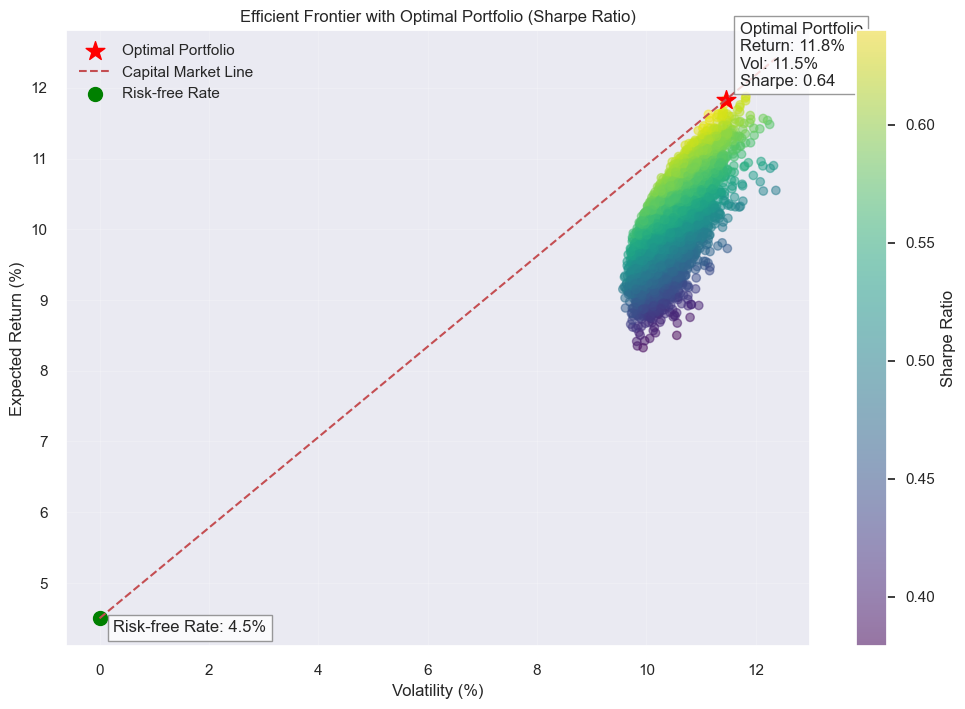

In [10]:
# Example with custom estimates

tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'WMT', 'PG', 'KO', 'MCD', 'HD', 'UNH']
# Create sample expected returns and covariance matrix
expected_returns = pd.Series({
    'AAPL': 0.15,
    'MSFT': 0.12, 
    'JPM': 0.10,
    'V': 0.11,
    'WMT': 0.08,
    'PG': 0.07,
    'KO': 0.06,
    'MCD': 0.09,
    'HD': 0.10,
    'UNH': 0.13
})

covariance_matrix = pd.DataFrame({
    'AAPL': [0.04, 0.02, 0.015, 0.01, 0.005, 0.003, 0.002, 0.004, 0.006, 0.008],
    'MSFT': [0.02, 0.03, 0.012, 0.011, 0.006, 0.004, 0.003, 0.005, 0.007, 0.009],
    'JPM': [0.015, 0.012, 0.035, 0.02, 0.008, 0.005, 0.004, 0.006, 0.008, 0.01],
    'V': [0.01, 0.011, 0.02, 0.03, 0.007, 0.004, 0.003, 0.005, 0.007, 0.009],
    'WMT': [0.005, 0.006, 0.008, 0.007, 0.025, 0.01, 0.008, 0.009, 0.01, 0.011],
    'PG': [0.003, 0.004, 0.005, 0.004, 0.01, 0.02, 0.009, 0.008, 0.009, 0.01],
    'KO': [0.002, 0.003, 0.004, 0.003, 0.008, 0.009, 0.015, 0.007, 0.008, 0.009],
    'MCD': [0.004, 0.005, 0.006, 0.005, 0.009, 0.008, 0.007, 0.025, 0.01, 0.011],
    'HD': [0.006, 0.007, 0.008, 0.007, 0.01, 0.009, 0.008, 0.01, 0.03, 0.012],
    'UNH': [0.008, 0.009, 0.01, 0.009, 0.011, 0.01, 0.009, 0.011, 0.012, 0.035]
}, index=['AAPL', 'MSFT', 'JPM', 'V', 'WMT', 'PG', 'KO', 'MCD', 'HD', 'UNH'])

# Initialize optimizer with custom estimates
optimizer_custom = MonteCarloOptimizer(
    tickers=tickers,
    estimate_method="custom",
    expected_returns=expected_returns,
    covariance_matrix=covariance_matrix,
    risk_free_rate=0.045,
    ratio="sharpe"
)

# Run optimization with custom estimates
result_custom = optimizer_custom.run_monte_carlo(n_simulations=10000)

# Print results
print("\nOptimal Portfolio Weights (Custom Estimates):")
for ticker, weight in result_custom.weights.items():
    print(f"{ticker}: {weight:.4f}")

print("\nPortfolio Metrics (Custom Estimates):")
print(f"Expected Return: {result_custom.expected_return:.4f}")
print(f"Volatility: {result_custom.volatility:.4f}")
print(f"Sharpe Ratio: {result_custom.ratio_value:.4f}")

# Plot results
optimizer_custom.plot(save_path='efficient_frontier_custom.png', live=True)
